<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,71.425910,83.120077,50.496371,98.157827,301.440690,614.640875,365.982011,248.658863
1,0.0,1.0,89.675758,90.259043,45.915242,22.115421,-49.712936,208.252528,258.012114,-49.759586
2,0.0,2.0,55.398382,38.443463,37.288793,35.429788,-4.584337,171.976088,110.637475,61.338614
3,0.0,3.0,73.507087,57.425484,67.603294,34.284640,-14.857283,227.963222,232.774658,-4.811436
4,0.0,4.0,50.061663,95.052634,61.126121,32.142974,-261.195272,-12.811879,175.625643,-188.437522
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.776034,40.589850,66.209388,78.370770,47.469644,281.415687,238.876851,42.538836
19996,999.0,16.0,74.833878,79.306900,38.135674,70.451690,-227.106746,45.621396,311.875435,-266.254039
19997,999.0,17.0,36.773620,91.592024,31.888677,40.473727,67.242372,277.970419,211.596810,66.373610
19998,999.0,18.0,42.582497,81.281073,51.699744,29.057645,217.263415,431.884375,223.303117,208.581258


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,71.425910,83.120077,50.496371,98.157827,301.440690,614.640875,365.982011,248.658863
1,0.0,1.0,89.675758,90.259043,45.915242,22.115421,-49.712936,208.252528,258.012114,-49.759586
2,0.0,2.0,55.398382,38.443463,37.288793,35.429788,-4.584337,171.976088,110.637475,61.338614
3,0.0,3.0,73.507087,57.425484,67.603294,34.284640,-14.857283,227.963222,232.774658,-4.811436
4,0.0,4.0,50.061663,95.052634,61.126121,32.142974,-261.195272,-12.811879,175.625643,-188.437522
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.776034,40.589850,66.209388,78.370770,47.469644,281.415687,238.876851,42.538836
19996,999.0,16.0,74.833878,79.306900,38.135674,70.451690,-227.106746,45.621396,311.875435,-266.254039
19997,999.0,17.0,36.773620,91.592024,31.888677,40.473727,67.242372,277.970419,211.596810,66.373610
19998,999.0,18.0,42.582497,81.281073,51.699744,29.057645,217.263415,431.884375,223.303117,208.581258


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    71.425910  83.120077  50.496371  98.157827  301.440690   
      1.0    89.675758  90.259043  45.915242  22.115421  -49.712936   
      2.0    55.398382  38.443463  37.288793  35.429788   -4.584337   
      3.0    73.507087  57.425484  67.603294  34.284640  -14.857283   
      4.0    50.061663  95.052634  61.126121  32.142974 -261.195272   
...                ...        ...        ...        ...         ...   
999.0 15.0   38.776034  40.589850  66.209388  78.370770   47.469644   
      16.0   74.833878  79.306900  38.135674  70.451690 -227.106746   
      17.0   36.773620  91.592024  31.888677  40.473727   67.242372   
      18.0   42.582497  81.281073  51.699744  29.057645  217.263415   
      19.0   91.298882  93.410467  96.673222  61.870300  311.987138   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    614.640875  365.982011  248.658863  
      1.0    208.252528  258.012114  -49.759586  
      2.0    171.976088  110.637475   61.338614  
      3.0    227.963222  232.774658   -4.811436  
      4.0    -12.811879  175.625643 -188.437522  
...                 ...         ...         ...  
999.0 15.0   281.415687  238.876851   42.538836  
      16.0    45.621396  311.875435 -266.254039  
      17.0   277.970419  211.596810   66.373610  
      18.0   431.884375  223.303117  208.581258  
      19.0   665.240008  433.091009  232.148999  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    71.425910  83.120077  50.496371  98.157827  301.440690   
      1.0    89.675758  90.259043  45.915242  22.115421  -49.712936   
      2.0    55.398382  38.443463  37.288793  35.429788   -4.584337   
      3.0    73.507087  57.425484  67.603294  34.284640  -14.857283   
      4.0    50.061663  95.052634  61.126121  32.142974 -261.195272   
...                ...        ...        ...        ...         ...   
999.0 15.0   38.776034  40.589850  66.209388  78.370770   47.469644   
      16.0   74.833878  79.306900  38.135674  70.451690 -227.106746   
      17.0   36.773620  91.592024  31.888677  40.473727   67.242372   
      18.0   42.582497  81.281073  51.699744  29.057645  217.263415   
      19.0   91.298882  93.410467  96.673222  61.870300  311.987138   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    614.640875  365.982011  248.658863  
      1.0    208.252528  258.012114  -49.759586  
      2.0    171.976088  110.637475   61.338614  
      3.0    227.963222  232.774658   -4.811436  
      4.0    -12.811879  175.625643 -188.437522  
...                 ...         ...         ...  
999.0 15.0   281.415687  238.876851   42.538836  
      16.0    45.621396  311.875435 -266.254039  
      17.0   277.970419  211.596810   66.373610  
      18.0   431.884375  223.303117  208.581258  
      19.0   665.240008  433.091009  232.148999  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,71.425910,83.120077,50.496371,98.157827,301.440690,614.640875,365.982011,248.658863
1,0.0,1.0,89.675758,90.259043,45.915242,22.115421,-49.712936,208.252528,258.012114,-49.759586
2,0.0,2.0,55.398382,38.443463,37.288793,35.429788,-4.584337,171.976088,110.637475,61.338614
3,0.0,3.0,73.507087,57.425484,67.603294,34.284640,-14.857283,227.963222,232.774658,-4.811436
4,0.0,4.0,50.061663,95.052634,61.126121,32.142974,-261.195272,-12.811879,175.625643,-188.437522
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,38.776034,40.589850,66.209388,78.370770,47.469644,281.415687,238.876851,42.538836
19996,999.0,16.0,74.833878,79.306900,38.135674,70.451690,-227.106746,45.621396,311.875435,-266.254039
19997,999.0,17.0,36.773620,91.592024,31.888677,40.473727,67.242372,277.970419,211.596810,66.373610
19998,999.0,18.0,42.582497,81.281073,51.699744,29.057645,217.263415,431.884375,223.303117,208.581258


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    71.425910  83.120077  50.496371  98.157827  301.440690   
      1.0    89.675758  90.259043  45.915242  22.115421  -49.712936   
      2.0    55.398382  38.443463  37.288793  35.429788   -4.584337   
      3.0    73.507087  57.425484  67.603294  34.284640  -14.857283   
      4.0    50.061663  95.052634  61.126121  32.142974 -261.195272   
...                ...        ...        ...        ...         ...   
999.0 15.0   38.776034  40.589850  66.209388  78.370770   47.469644   
      16.0   74.833878  79.306900  38.135674  70.451690 -227.106746   
      17.0   36.773620  91.592024  31.888677  40.473727   67.242372   
      18.0   42.582497  81.281073  51.699744  29.057645  217.263415   
      19.0   91.298882  93.410467  96.673222  61.870300  311.987138   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    614.640875  365.982011  248.658863  
      1.0    208.252528  258.012114  -49.759586  
      2.0    171.976088  110.637475   61.338614  
      3.0    227.963222  232.774658   -4.811436  
      4.0    -12.811879  175.625643 -188.437522  
...                 ...         ...         ...  
999.0 15.0   281.415687  238.876851   42.538836  
      16.0    45.621396  311.875435 -266.254039  
      17.0   277.970419  211.596810   66.373610  
      18.0   431.884375  223.303117  208.581258  
      19.0   665.240008  433.091009  232.148999  

[20000 rows x 8 columns]

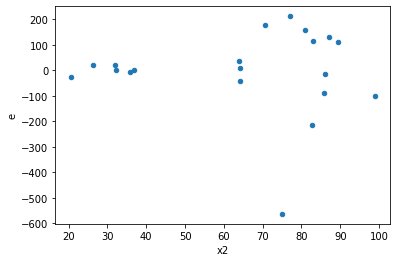

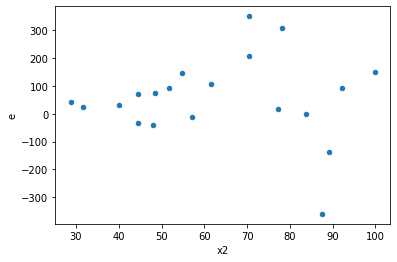

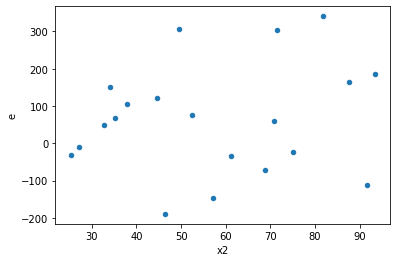

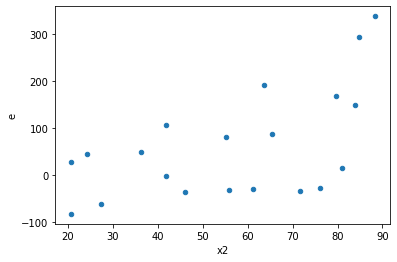

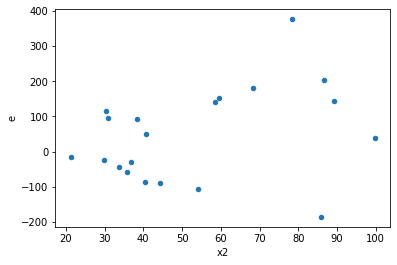

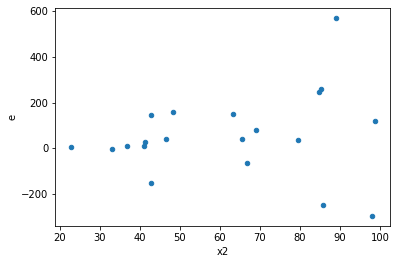

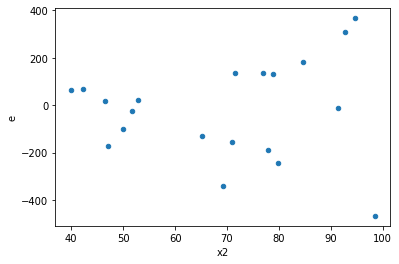

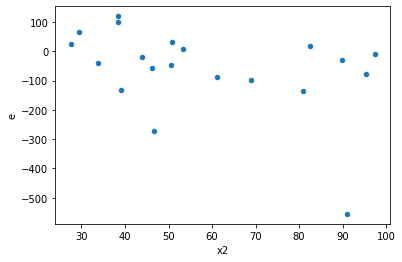

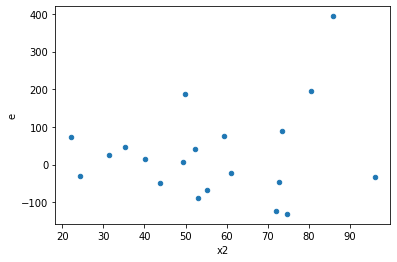

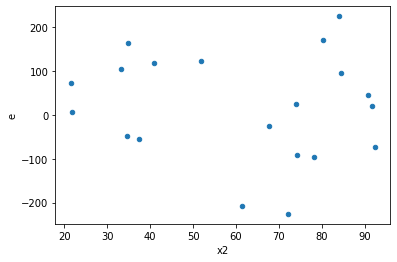

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,4.0,4.0,61845.414086110395,178526.7894184793,15461.353521527599,44631.69735461983,2.8866617203000327,0.32906085814289554,0.8354695709285522,0.16453042907144777,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,16388.204747199838,29490.048605405802,4097.051186799959,7372.5121513514505,1.7994679136800877,0.5832774061330381,0.7083612969334809,0.29163870306651907,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,5053.588316711576,72761.333887663,1263.397079177894,18190.33347191575,14.39795434999137,0.02421045090267082,0.9878947745486646,0.01210522545133541,Reject005=0 : Heteroscedasticity
9.0,4.0,4.0,16483.03765296313,45390.61814992873,4120.759413240782,11347.654537482182,2.7537774957256698,0.3501852847748672,0.8249073576125664,0.1750926423874336,Reject005=1 : Homoscedasticity
12.0,4.0,4.0,34252.638606759625,114091.63871257156,8563.159651689906,28522.90967814289,3.3308861259539877,0.2706465110109737,0.8646767444945131,0.13532325550548685,Reject005=1 : Homoscedasticity
13.0,4.0,4.0,18772.62547791273,21757.962483913154,4693.156369478183,5439.4906209782885,1.1590260781323782,0.8897152098636445,0.5551423950681778,0.44485760493182225,Reject005=1 : Homoscedasticity
15.0,4.0,4.0,77564.90546261016,115445.22915185333,19391.22636565254,28861.307287963333,1.4883693658016928,0.7093886143894634,0.6453056928052683,0.3546943071947317,Reject005=1 : Homoscedasticity
16.0,4.0,4.0,129524.28346680768,332648.7852717693,32381.07086670192,83162.19631794232,2.5682349005776586,0.38319843636067263,0.8084007818196637,0.19159921818033632,Reject005=1 : Homoscedasticity
18.0,4.0,4.0,8685.006385111368,181242.01716652027,2171.251596277842,45310.504291630066,20.868380416763067,0.012163886428768533,0.9939180567856157,0.006081943214384267,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,153817.61438636217,73246.58173165236,38454.40359659054,18311.64543291309,0.4761911177979274,0.49008166899404904,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,85014.13323754902,47180.109591013024,21253.533309387254,11795.027397753256,0.5549678364558627,0.5824210573856072,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,61845.414086110395,178526.7894184793,15461.353521527599,44631.69735461983,2.8866617203000327,0.32906085814289554,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,36829.959432811134,24833.636566087815,9207.489858202784,6208.409141521954,0.6742781406368855,0.7118645472045708,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,64670.691881770406,6501.6951575796165,16167.672970442602,1625.4237893949041,0.10053541980756721,0.047021102807475824,Reject005=0 : Heteroscedasticity
5.0,4.0,4.0,99712.89431854083,20591.393455873615,24928.223579635207,5147.848363968404,0.20650682739278192,0.15571901297616664,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,171302.67130146685,29892.93111329036,42825.66782536671,7473.23277832259,0.17450358996844428,0.11933051207205389,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,16388.204747199838,29490.048605405802,4097.051186799959,7372.5121513514505,1.7994679136800877,0.5832774061330381,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,5053.588316711576,72761.333887663,1263.397079177894,18190.33347191575,14.39795434999137,0.02421045090267082,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      814
Reject005=0 : Heteroscedasticity    186
Name: Result_test, dtype: int64